<a href="https://colab.research.google.com/github/siahw/pytorch/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import torch
import matplotlib.pyplot as plt #mat lab의 library
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #학습과정계산

In [4]:
arr=[1,2,3,4,5]
nparr=np.array(arr)
nparr2=np.array((1,2,3,4,5))
print(nparr)
print(nparr2)

[1 2 3 4 5]
[1 2 3 4 5]


In [5]:
nparr3=np.array([nparr,nparr2])
print(nparr3)
r,c=np.shape(nparr3)
print(r,c)
for i in range(r):
  for j in range(c):
    print(nparr3[i][j])

[[1 2 3 4 5]
 [1 2 3 4 5]]
2 5
1
2
3
4
5
1
2
3
4
5


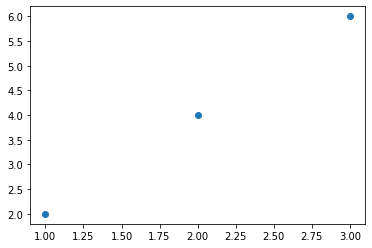

In [44]:
x_train=torch.FloatTensor([[1],[2],[3]])
y_train=torch.FloatTensor([[2],[4],[6]])
plt.scatter(x_train,y_train)

In [28]:
x=np.linspace(0,10,11)
y=np.linspace(0,10,11)

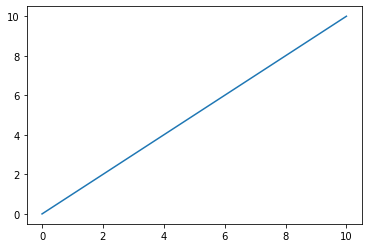

In [29]:
plt.plot(x,y)

In [14]:
w=torch.zeros(1,requires_grad=True)#영인데 값이 바뀔 것weight
print(w)
b=torch.zeros(1,requires_grad=True)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [15]:
hypothesis=x_train*w+b

In [16]:
cost=torch.mean((hypothesis-y_train)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [35]:
optimizer=optim.SGD([w,b],lr=0.01)

In [36]:
optimizer.zero_grad() #gradient초기화
cost.backward()#cost기울기계산
optimizer.step()#w와b업데이트

In [48]:
num_epochs =1000
for epoch in range(num_epochs):
  hypothesis=x_train*w+b
  cost=torch.mean((hypothesis-y_train)**2)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

if epoch%100==0:
  print('Epoch{:4d}/{}w:{:},b:{:},cost:{:.6f}'.format(epoch,num_epochs,w.item(),b.item(),cost.item()))

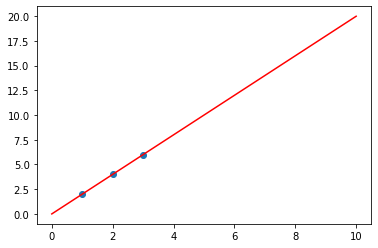

In [47]:
w2=w.detach().numpy()
b2=b.detach().numpy()
plt.plot(x,w2*x+b2,'r')
plt.scatter(x_train,y_train)